Assignment-1 statement
------------------------------------
Problem statement:Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants:

     1.To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

     2.To create a linear model that quantitatively relates house prices with variables such as number of rooms, area,                     number of bathrooms, etc.
     3.To know the accuracy of the model, i.e. how well these variables can predict house prices.
     
(Note:use regularisation concept to avoid over-fitting)

In [84]:
# necessary Imports
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_csv(r"F:\Sorted Notes\4-ML\DAy-9 18-11-2022 ML LiR code and Assignment\Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [86]:
data.shape

(545, 13)

In [87]:
data.isna().sum() #no nul value present

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [88]:
cor_matrix = data.corr() #None of the 2 features have correlation greater than 0.5.
cor_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [89]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [90]:
# create three dummy variables using get_dummies, then exclude the first dummy column
mainroad_dummies = pd.get_dummies(data['mainroad'], prefix='Dummy mainroad').iloc[:, 1:]
guestroom_dummies = pd.get_dummies(data['guestroom'], prefix='Dummy guestroom').iloc[:, 1:]
basement_dummies = pd.get_dummies(data['basement'], prefix='Dummy basement').iloc[:, 1:]
hotwaterheating_dummies = pd.get_dummies(data['hotwaterheating'], prefix='Dummy hotwaterheating').iloc[:, 1:]
airconditioning_dummies = pd.get_dummies(data['airconditioning'], prefix='Dummy airconditioning').iloc[:, 1:]
prefarea_dummies = pd.get_dummies(data['prefarea'], prefix='Dummy prefarea').iloc[:, 1:]
furnishingstatus_dummies = pd.get_dummies(data['furnishingstatus'], prefix='Dummy furnishingstatus').iloc[:, 1:]
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, mainroad_dummies,guestroom_dummies,basement_dummies,hotwaterheating_dummies,airconditioning_dummies,prefarea_dummies,furnishingstatus_dummies], axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Dummy mainroad_yes,Dummy guestroom_yes,Dummy basement_yes,Dummy hotwaterheating_yes,Dummy airconditioning_yes,Dummy prefarea_yes,Dummy furnishingstatus_semi-furnished,Dummy furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0,0


In [92]:
feature_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','Dummy mainroad_yes', 'Dummy guestroom_yes','Dummy basement_yes','Dummy hotwaterheating_yes','Dummy airconditioning_yes','Dummy prefarea_yes','Dummy furnishingstatus_semi-furnished','Dummy furnishingstatus_unfurnished']
X = data[feature_cols]
y = data.price

In [93]:
print(X.shape, y.shape)

(545, 13) (545,)


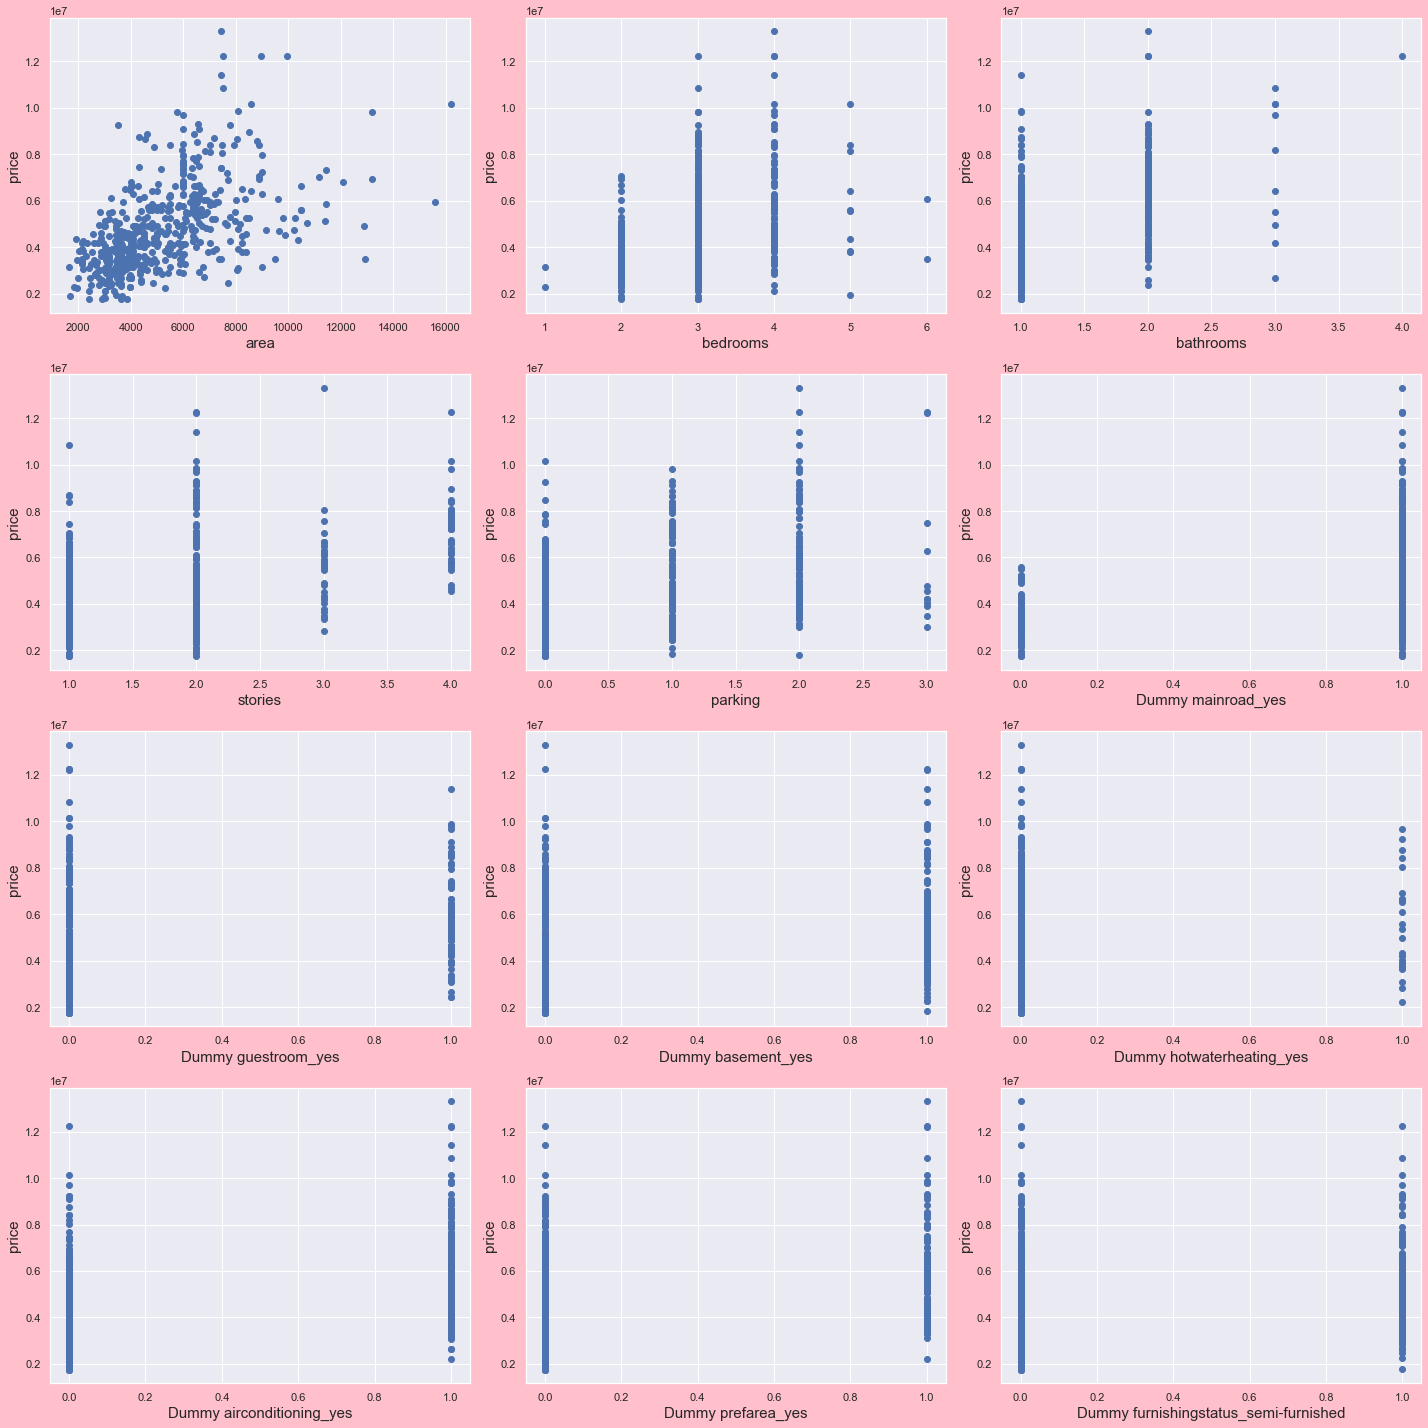

In [95]:
plt.figure(figsize=(20,20),facecolor='pink')
pltno = 1
for i in X:
    if pltno<13:
        ax = plt.subplot(4,3,pltno)
        plt.scatter(X[i],y)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('price',fontsize=15)
    pltno = pltno+1
plt.tight_layout()

In [96]:
scaler =StandardScaler()
#y_2d = [y]
X_scaled = scaler.fit_transform(X)

In [97]:
print(X_scaled.shape, y.shape)

(545, 13) (545,)


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif #All columns have VIF less than 5 so no multicollinearity exist.

,VIF,Features
0,1.325250,area
1,1.369477,bedrooms
2,1.286621,bathrooms
3,1.478055,stories
4,1.212837,parking
5,1.172728,Dummy mainroad_yes
6,1.212838,Dummy guestroom_yes
7,1.323050,Dummy basement_yes
8,1.041506,Dummy hotwaterheating_yes
9,1.211840,Dummy airconditioning_yes


In [99]:
def LM(X,y):
    X = sm.add_constant(X) # Adding the constant column of values 1.
    #By default, statsmodels fits a line passing through the origin, 
    #i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.
    lm = sm.OLS(y,X).fit() # fitting the model #statsmodels.regression.linear_model.OLS.fit
    print(lm.summary())    # model summary
    return lm

In [128]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [100]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state=123)

In [101]:
print(x_train.shape,x_test.shape)

(381, 13) (164, 13)


In [102]:
print(y_train.shape,y_test.shape)

(381,) (164,)


In [122]:
#method-1 straight forward method
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [123]:
y_pred1 = lr.predict(x_test)

In [125]:
lr.score(x_train, y_train)

0.7019686451598812

In [126]:
lr.score(x_test, y_test)

0.6139746136817688

In [129]:
print(adj_r2(x_train, y_train, lr))

0.691411676187343


In [130]:
print(adj_r2(x_test, y_test, lr)) #as 

0.5805190802008554


In [ ]:
#-----------------------------------------------------------------------------------

In [143]:
#Using LM function we are getting same result
model1_train = LM(x_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     66.49
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           5.25e-88
Time:                        21:50:46   Log-Likelihood:                -5809.5
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     367   BIC:                         1.170e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.739e+06   5.31e+04     89.250      0.0

In [144]:
model1_test = LM(x_test,y_test)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     24.87
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           4.30e-31
Time:                        21:50:51   Log-Likelihood:                -2509.0
No. Observations:                 164   AIC:                             5046.
Df Residuals:                     150   BIC:                             5089.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.868e+06   8.86e+04     54.957      0.0

In [145]:
x_train.shape

(381, 13)

In [146]:
x_train_new1 = np.delete(x_train,[2,9,12],1)
x_test_new1 = np.delete(x_test,[2,9,12],1)

In [147]:
model2_train = LM(x_train_new1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     52.04
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.68e-64
Time:                        21:51:14   Log-Likelihood:                -5872.8
No. Observations:                 381   AIC:                         1.177e+04
Df Residuals:                     370   BIC:                         1.181e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.735e+06   6.24e+04     75.835      0.0

In [148]:
model2_test = LM(x_test_new1,y_test)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     23.92
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.23e-26
Time:                        21:51:27   Log-Likelihood:                -2526.0
No. Observations:                 164   AIC:                             5074.
Df Residuals:                     153   BIC:                             5108.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.874e+06   9.72e+04     50.120      0.0

In [149]:
x_train_new2 = np.delete(x_train,[5,8,10],1)
x_test_new2 = np.delete(x_test,[5,8,10],1)

In [150]:
model3_train = LM(x_train_new2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     76.84
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           5.41e-84
Time:                        21:51:53   Log-Likelihood:                -5826.0
No. Observations:                 381   AIC:                         1.167e+04
Df Residuals:                     370   BIC:                         1.172e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.741e+06   5.52e+04     85.953      0.0

In [152]:
model3_test = LM(x_test_new2,y_test)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     26.05
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           2.45e-28
Time:                        21:52:58   Log-Likelihood:                -2521.7
No. Observations:                 164   AIC:                             5065.
Df Residuals:                     153   BIC:                             5099.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.888e+06   9.44e+04     51.783      0.0

In [153]:
x_train_new3 = np.delete(x_train,[2,9],1)
x_test_new3 = np.delete(x_test,[2,9],1)

In [154]:
model4_train = LM(x_train_new3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     49.49
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           7.50e-66
Time:                        21:59:03   Log-Likelihood:                -5867.5
No. Observations:                 381   AIC:                         1.176e+04
Df Residuals:                     369   BIC:                         1.181e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.735e+06   6.16e+04     76.817      0.0

In [155]:
model4_test = LM(x_test_new3,y_test)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     22.29
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.52e-26
Time:                        21:59:35   Log-Likelihood:                -2524.5
No. Observations:                 164   AIC:                             5073.
Df Residuals:                     152   BIC:                             5110.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.874e+06   9.66e+04     50.441      0.0

In [156]:
x_train_new4 = np.delete(x_train,[5,8],1)
x_test_new4 = np.delete(x_test,[5,8],1)

In [157]:
model5_train = LM(x_train_new4,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     77.20
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.28e-88
Time:                        22:02:39   Log-Likelihood:                -5812.6
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     369   BIC:                         1.170e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.738e+06   5.33e+04     88.837      0.0

In [158]:
model5_test = LM(x_test_new4,y_test)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     24.97
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           7.95e-29
Time:                        22:03:24   Log-Likelihood:                -2518.6
No. Observations:                 164   AIC:                             5061.
Df Residuals:                     152   BIC:                             5098.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.89e+06   9.29e+04     52.623      0.0

In [ ]:
#as r-square and adj-r-square values are decresing during test time. Model may be overfitting. So we use regularization.

In [162]:
#Lasso Regularization
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train_new4, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [163]:
alpha = lasso_cv.alpha_
alpha

523.1740551569342

In [164]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train_new4, y_train)

Lasso(alpha=523.1740551569342)

In [165]:
lasso.score(x_train_new4, y_train)

0.6971008296338497

In [166]:
lasso.score(x_test_new4, y_test)

0.586606237686853

In [187]:
print(adj_r2(x_train_new4, y_train, lasso))

0.688071315070089


In [188]:
print(adj_r2(x_test_new4, y_test, lasso))

0.5566895838352437


In [170]:
#Ridge Regularization
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(x_train_new4, y_train)

RidgeCV(alphas=array([1.68370299e+00, 7.05457538e+00, 4.99078101e+00, 4.42493929e+00,
       1.52769643e+00, 5.89727372e+00, 7.16785231e+00, 5.20459268e+00,
       9.22637224e+00, 9.36107376e+00, 6.32309003e+00, 3.77290777e+00,
       6.01829047e+00, 6.82503363e-01, 7.36348190e+00, 3.46607028e+00,
       4.89484677e+00, 9.27355599e+00, 5.66759614e+00, 9.27183704e+00,
       4.13463477e+00, 9.32719187e+0...
       2.93715230e+00, 3.58823466e+00, 4.99029768e+00, 3.52286359e+00,
       4.45856406e+00, 3.45252439e-01, 9.27862647e-01, 5.68369908e+00,
       8.19919876e+00, 9.20521578e+00, 3.63389332e+00, 3.80008028e+00,
       4.91693812e+00, 3.73820756e-01, 3.34838243e+00, 9.38650467e-02,
       6.98423729e+00, 6.61260713e+00, 8.78954816e+00, 8.75280945e+00,
       3.93967474e+00, 7.83608445e+00]),
        cv=10, normalize=True)

In [171]:
alpha = ridge_cv.alpha_
alpha

0.09386504672992291

In [172]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train_new4, y_train)

Ridge(alpha=0.09386504672992291)

In [173]:
ridge.score(x_train_new4, y_train)

0.6971014242972076

In [174]:
ridge.score(x_test_new4, y_test)

0.586655457569144

In [189]:
print(adj_r2(x_train_new4, y_train, ridge))

0.6880719274605389


In [190]:
print(adj_r2(x_test_new4, y_test, ridge))

0.5567423656827004


#Observation
-------------------
#Features affecting house price are
---------------------------------------------------
area,bedrooms,bathrooms,stories,parking,guest_room,bathroom,basement,airconditioning,prefarea,furnishingstatus

#
As Lasso and Ridge regularization are giving same accuracy during on train and test data. The model is not overfitting.
Y = 4.738e+06 + 6.442e+05*x1 + 4.881e+04*x2 + 4.965e+05*x3 + 3.73e+05*x4 + 1.924e+05*x5 + 1.552e+05*x6 + 
    1.525e+05*x7 + 4.244e+05*x8 + 2.966e+05*x9 - 4987.6430*x10 - 1.921e+05*x11

#Accuracy
-----------------
                    Train   |   Test    |   Lasso(train)   |   Lasso(Test)   |   Ridge(train)   |   Ridge(Test) 
r-square         |  69.7%   |   64.4%   |   69.7%          |    58.6%        |   69.7%          |   58.66%
adj. r-square    |  68.8%   |   61.8%   |   68.88%         |    55.66%       |   68.88%         |   55.67%